In [1]:
import cv2                 # For image and video processing
import mediapipe as mp     # For pose estimation
import numpy as np
mp_drawing= mp.solutions.drawing_utils      # help draw landmarks and connections on images or video frames, for visualization during pose estimation.
mp_pose= mp.solutions.pose                  # contains the pre-trained machine learning model for pose estimation

### Getting Video Feed

In [13]:
# Video feed

cap= cv2.VideoCapture(0)   # here 0 is the default video capture [ here its webcam ], we can give 1 for secondary camera


with mp_pose.Pose(min_detection_confidence= .05, min_tracking_confidence= .05) as pose:
    
    while cap.isOpened():
        ret, frame= cap.read()
        
        # Detect stuff and render
        image= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Open cv reads the image as BGR, but mediapipe needs RGB
        image.flags.writeable= False                    # Now its read only, saving us some memory
        
        
        # Make detection
        results= pose.process(image)
        
        # Recolour back to BGR
         
        image.flags.writeable = True
        image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(85,255,85), thickness=2, circle_radius=2), # landmark
                                 connection_drawing_spec= mp_drawing.DrawingSpec(color=(50,21,201), thickness=2))  # connections
                                  
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

        """
            Here the system checks every 10 milliseconds if any button is pressed,
            if keyboard input may differ with the configuration as if numlock is turned on
            the q output might be 1048675 which maight be 10000000000000001100011 in binary,
            if its turned off the input will be 99 which is 1100011, but here we can see that
            the last 8 digits are always the same. So inorder to filter only the last 8 digits,
            we will do a bitwise AND operation with FF ( 11111111 ). So that we will get only
            the last 8 digits and the sysytem can verify if the pressed key was q or not

            # Here ord('q') means ASCII of q
        """

    cap.release()           # release the video capture
    cv2.destroyAllWindows()  # If q is clicked close the window

### The Joints of Mediapipe

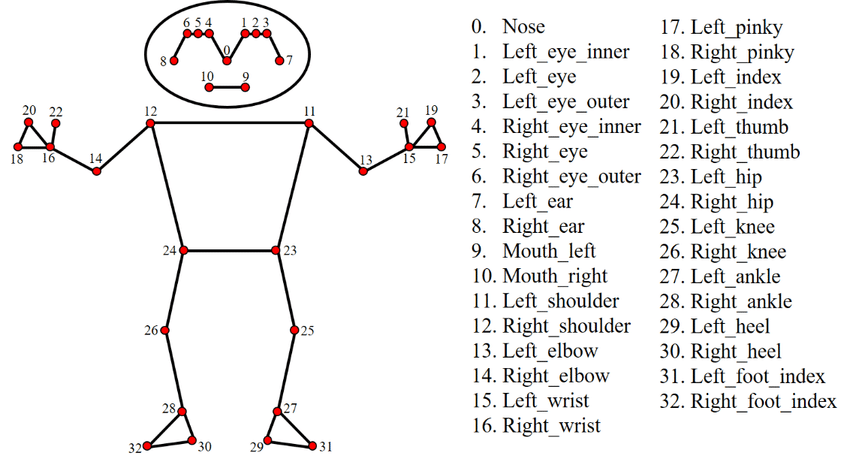

### Getting landmarks

In [10]:
cap= cv2.VideoCapture(0)   # here 0 is the default video capture [ here its webcam ], we can give 1 for secondary camera


with mp_pose.Pose(min_detection_confidence= .05, min_tracking_confidence= .05) as pose:
    
    while cap.isOpened():
        ret, frame= cap.read()
        
        # Detect stuff and render
        image= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Open cv reads the image as BGR, but mediapipe needs RGB
        image.flags.writeable= False                    # Now its read only, saving us some memory
        
        
        # Make detection
        results= pose.process(image)
        
        # Recolour back to BGR
         
        image.flags.writeable = True
        image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks= results.pose_landmarks.landmark
            print(landmarks)
        except Exception as e:
            raise e
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(85,255,85), thickness=2, circle_radius=2), # landmark
                                 connection_drawing_spec= mp_drawing.DrawingSpec(color=(50,21,201), thickness=2))  # connections
                                  
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()           # release the video capture
    cv2.destroyAllWindows()  # If q is clicked close the window

[x: 0.57105625
y: 0.7511782
z: -1.3267887
visibility: 0.9996958
, x: 0.59570956
y: 0.6880098
z: -1.2697053
visibility: 0.9997837
, x: 0.6102067
y: 0.6843952
z: -1.2699845
visibility: 0.9998103
, x: 0.623552
y: 0.68126017
z: -1.2701354
visibility: 0.99981934
, x: 0.54915524
y: 0.6902106
z: -1.2527692
visibility: 0.9996331
, x: 0.5326286
y: 0.6879787
z: -1.252644
visibility: 0.99954945
, x: 0.51869106
y: 0.6861923
z: -1.2528603
visibility: 0.9994779
, x: 0.6468226
y: 0.6873137
z: -0.8666304
visibility: 0.9999151
, x: 0.5064882
y: 0.6970205
z: -0.77703255
visibility: 0.999648
, x: 0.601622
y: 0.79735255
z: -1.1701585
visibility: 0.99966407
, x: 0.5463979
y: 0.8003835
z: -1.1464257
visibility: 0.99948263
, x: 0.7777718
y: 0.94004494
z: -0.69013107
visibility: 0.9914432
, x: 0.40330753
y: 0.9350059
z: -0.4959117
visibility: 0.952247
, x: 0.79898596
y: 1.3031771
z: -1.3904468
visibility: 0.82232493
, x: 0.32782948
y: 1.241618
z: -1.120703
visibility: 0.27563697
, x: 0.68051255
y: 0.97391593


In [12]:
len(landmarks)

33

In [13]:
landmarks

[x: 0.5845728
y: 0.754706
z: -1.2896016
visibility: 0.99729264
, x: 0.6033121
y: 0.6863894
z: -1.2419326
visibility: 0.996993
, x: 0.61612284
y: 0.6825401
z: -1.2424085
visibility: 0.9971278
, x: 0.62796533
y: 0.6788759
z: -1.2426555
visibility: 0.9970334
, x: 0.55503213
y: 0.69062644
z: -1.2462906
visibility: 0.99676603
, x: 0.53653
y: 0.689938
z: -1.2465607
visibility: 0.9966861
, x: 0.5210465
y: 0.68964756
z: -1.2469723
visibility: 0.99660975
, x: 0.64134777
y: 0.68259686
z: -0.8152965
visibility: 0.99776495
, x: 0.50129855
y: 0.69774413
z: -0.8277564
visibility: 0.9965885
, x: 0.6109669
y: 0.7982867
z: -1.1157815
visibility: 0.9969077
, x: 0.55529064
y: 0.8082017
z: -1.1207417
visibility: 0.99670964
, x: 0.7811379
y: 0.96597373
z: -0.51082706
visibility: 0.97384065
, x: 0.3868621
y: 0.95717627
z: -0.45757657
visibility: 0.93879265
, x: 0.8321449
y: 1.258812
z: -0.6154114
visibility: 0.25214377
, x: 0.32812405
y: 1.2737848
z: -0.67764825
visibility: 0.13043246
, x: 0.7952717
y: 1.47

In [15]:
lm=[]
for landmark in mp_pose.PoseLandmark:
    print(landmark)
    lm.append(landmark)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [16]:
dic= {i : lm[i] for i in range(30)}
dic

{0: <PoseLandmark.NOSE: 0>,
 1: <PoseLandmark.LEFT_EYE_INNER: 1>,
 2: <PoseLandmark.LEFT_EYE: 2>,
 3: <PoseLandmark.LEFT_EYE_OUTER: 3>,
 4: <PoseLandmark.RIGHT_EYE_INNER: 4>,
 5: <PoseLandmark.RIGHT_EYE: 5>,
 6: <PoseLandmark.RIGHT_EYE_OUTER: 6>,
 7: <PoseLandmark.LEFT_EAR: 7>,
 8: <PoseLandmark.RIGHT_EAR: 8>,
 9: <PoseLandmark.MOUTH_LEFT: 9>,
 10: <PoseLandmark.MOUTH_RIGHT: 10>,
 11: <PoseLandmark.LEFT_SHOULDER: 11>,
 12: <PoseLandmark.RIGHT_SHOULDER: 12>,
 13: <PoseLandmark.LEFT_ELBOW: 13>,
 14: <PoseLandmark.RIGHT_ELBOW: 14>,
 15: <PoseLandmark.LEFT_WRIST: 15>,
 16: <PoseLandmark.RIGHT_WRIST: 16>,
 17: <PoseLandmark.LEFT_PINKY: 17>,
 18: <PoseLandmark.RIGHT_PINKY: 18>,
 19: <PoseLandmark.LEFT_INDEX: 19>,
 20: <PoseLandmark.RIGHT_INDEX: 20>,
 21: <PoseLandmark.LEFT_THUMB: 21>,
 22: <PoseLandmark.RIGHT_THUMB: 22>,
 23: <PoseLandmark.LEFT_HIP: 23>,
 24: <PoseLandmark.RIGHT_HIP: 24>,
 25: <PoseLandmark.LEFT_KNEE: 25>,
 26: <PoseLandmark.RIGHT_KNEE: 26>,
 27: <PoseLandmark.LEFT_ANKLE: 27

In [15]:
shoulder= [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
elbow= [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
wrist= [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

In [16]:
shoulder, elbow, wrist

([0.3868620991706848, 0.9571762681007385],
 [0.3281240463256836, 1.2737847566604614],
 [0.38469210267066956, 1.2724171876907349])

In [17]:
def calculate_angle(a,b,c):
    a= np.array(a) # First
    b= np.array(b) # Mid
    c= np.array(c) # End
    
    
    vect_ab = a-b
    vect_bc = c-b
    
    radians= np.arccos(np.dot(vect_ab,vect_bc)/(np.linalg.norm(vect_ab)*np.linalg.norm(vect_bc)))
    
    """
        Turned the points into vector and  with the equation ab.bc = |ab||bc|cosα
        
        α = cos^-1 (ab.bc/(|ab||bc|))
        
        The result will be in radian we convert that into degree
    
    """
    
    angles= np.abs(radians*180.0/np.pi)
    
    return angles

In [20]:
calculate_angle(shoulder, elbow, wrist)

36.58674826727554

In [8]:
cap= cv2.VideoCapture(0)   # here 0 is the default video capture [ here its webcam ], we can give 1 for secondary camera


with mp_pose.Pose(min_detection_confidence= .05, min_tracking_confidence= .05) as pose:
    
    while cap.isOpened():
        ret, frame= cap.read()
        
        # Detect stuff and render
        image= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Open cv reads the image as BGR, but mediapipe needs RGB
        image.flags.writeable= False                    # Now its read only, saving us some memory
        
        
        # Make detection
        results= pose.process(image)
        
        # Recolour back to BGR
         
        image.flags.writeable = True
        image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks= results.pose_landmarks.landmark
            
            #Getting coordinates
            shoulder= [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow= [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist= [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            print(shoulder)

            angle= calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                           tuple(np.multiply(elbow, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                       )
            
            
        except Exception as e:
            raise e
            #pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(85,255,85), thickness=2, circle_radius=2), # landmark
                                 connection_drawing_spec= mp_drawing.DrawingSpec(color=(50,21,201), thickness=2))  # connections
                                  
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()           # release the video capture
    cv2.destroyAllWindows()  # If q is clicked close the window

NameError: name 'landmark' is not defined

### Building our Counder

In [14]:
cap= cv2.VideoCapture(0)   # here 0 is the default video capture [ here its webcam ], we can give 1 for secondary camera


counter= 0
stage= None


with mp_pose.Pose(min_detection_confidence= .05, min_tracking_confidence= .05) as pose:
    
    while cap.isOpened():
        ret, frame= cap.read()
        
        # Detect stuff and render
        image= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Open cv reads the image as BGR, but mediapipe needs RGB
        image.flags.writeable= False                    # Now its read only, saving us some memory
        
        
        # Make detection
        results= pose.process(image)
        
        # Recolour back to BGR
         
        image.flags.writeable = True
        image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks= results.pose_landmarks.landmark
            
            #Getting coordinates
            shoulder= [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow= [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist= [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            angle= calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                           tuple(np.multiply(elbow, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA   # size, color, linewidth, linetype
                       )
            
            # Curl counter logic
            
            if angle < 50:
                stage= "up"
            if angle > 160 and stage=='up':
                stage= 'down'
                counter+= 1
                print(counter)       
            
        except:
            pass
        
        # Render curl counder
        #setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)  # input, start point, end point, colur, fill color or not
        
        # Rep data
        
        cv2.putText(image, "REPS", (7,15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA
                   )
        
        cv2.putText(image, str(counter), (10,60),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        
        # stage data
        
        cv2.putText(image, "STAGE", (75,15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA
               )
        
        cv2.putText(image, str(stage), (80,60),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                    )
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(85,255,85), thickness=2, circle_radius=2), # landmark
                                 connection_drawing_spec= mp_drawing.DrawingSpec(color=(50,21,201), thickness=2))  # connections
                                  
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()           # release the video capture
    cv2.destroyAllWindows()  # If q is clicked close the window

In [2]:
pip install pyyaml

   ---------------------------------------- 0.0/152.8 kB ? eta -:--:--
   -------------------------------- ------- 122.9/152.8 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 152.8/152.8 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2                 # For image and video processing
import mediapipe as mp     # For pose estimation
import numpy as np
mp_drawing= mp.solutions.drawing_utils      # help draw landmarks and connections on images or video frames, for visualization during pose estimation.
mp_pose= mp.solutions.pose 

In [2]:
def calculate_angle(a,b,c):
    a= np.array(a) # First
    b= np.array(b) # Mid
    c= np.array(c) # End
    
    
    vect_ab = a-b
    vect_bc = c-b
    
    radians= np.arccos(np.dot(vect_ab,vect_bc)/(np.linalg.norm(vect_ab)*np.linalg.norm(vect_bc)))
    
    """
        Turned the points into vector and  with the equation ab.bc = |ab||bc|cosα
        
        α = cos^-1 (ab.bc/(|ab||bc|))
        
        The result will be in radian we convert that into degree
    
    """
    
    angles= np.abs(radians*180.0/np.pi)
    
    return angles

In [3]:
import os

In [4]:
%pwd

'c:\\Users\\harik\\Desktop\\All Folder\\PGDA\\Interships & Projects\\Gym Tracker\\GymTracker_OpenCV\\research'

In [5]:
os.chdir("../")

In [6]:
%pwd

'c:\\Users\\harik\\Desktop\\All Folder\\PGDA\\Interships & Projects\\Gym Tracker\\GymTracker_OpenCV'

In [31]:
import yaml
from gymtracker.utils.common import read_yaml, calculate_angle
from pathlib import Path

params= read_yaml(Path("params.yaml"))

[2023-10-21 15:39:18,992: INFO: common: yaml file: params.yaml loaded succesfully]


In [32]:
cap= cv2.VideoCapture(0)   # here 0 is the default video capture [ here its webcam ], we can give 1 for secondary camera


counter= 0
stage= None


with mp_pose.Pose(min_detection_confidence= params.min_detection_confidence, min_tracking_confidence= params.min_tracking_confidence) as pose:
    
    while cap.isOpened():
        ret, frame= cap.read()
        
        # Detect stuff and render
        image= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Open cv reads the image as BGR, but mediapipe needs RGB
        image.flags.writeable= False                    # Now its read only, saving us some memory
        
        
        # Make detection
        results= pose.process(image)
        
        # Recolour back to BGR
         
        image.flags.writeable = True
        image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks= results.pose_landmarks.landmark
            
            #Getting coordinates
            shoulder= [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow= [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist= [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            angle= calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                           tuple(np.multiply(elbow, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA   # size, color, linewidth, linetype
                       )
            
            # Curl counter logic
            
            if angle < 50:
                stage= "up"
            if angle > 160 and stage=='up':
                stage= 'down'
                counter+= 1
                print(counter)       
            
        except Exception as e:
            raise e
            #pass
        
        # Render curl counder

        # setup status box
        rect_color= params.rectangle_color
        cv2.rectangle(image, (0,0), (225,73), rect_color, -1)  # input, start point, end point, colur, fill color or not
        
        # Rep data

        title_color= params.title_font_color
        value_color= params.rep_and_stage_color
        
        cv2.putText(image, "REPS", (7,15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, title_color, 1, cv2.LINE_AA
                   )
        
        cv2.putText(image, str(counter), (10,60),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, value_color, 2, cv2.LINE_AA
                    )
        
        
        # stage data
        
        cv2.putText(image, "STAGE", (75,15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, title_color, 1, cv2.LINE_AA
               )
        
        cv2.putText(image, str(stage), (80,60),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, value_color, 2, cv2.LINE_AA
                    )
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(85,255,85), thickness=2, circle_radius=2), # landmark
                                 connection_drawing_spec= mp_drawing.DrawingSpec(color=(50,21,201), thickness=2))  # connections
                                  
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord(params.window_close_key):
            break


    cap.release()           # release the video capture
    cv2.destroyAllWindows()  # If q is clicked close the window

1
2
3
4
